In [1]:
import pandas as pd 
import geopandas as gpd

## Densité

In [3]:
densite = pd.read_excel("..\data\densite_par_secteur.xlsx")
new_densite = densite[["CD_SECTOR","TOTAL","OPPERVLAKKTE IN HM²","CD_REFNIS"]]
new_densite = new_densite.rename(columns = {'TOTAL':'NOMBRE_HAB'})
new_densite = new_densite.rename(columns = {'OPPERVLAKKTE IN HM²':'DENSITE_PAR_HECTARE'})
new_densite.head()

,CD_SECTOR,NOMBRE_HAB,DENSITE_PAR_HECTARE,CD_REFNIS
0,11001A00-,2474,53.158956,11001
1,11001A01-,2805,67.115758,11001
2,11001A020,752,28.084816,11001
3,11001A030,441,42.812540,11001
4,11001A042,346,25.562366,11001


## Revenus

In [5]:
revenu = pd.read_excel("../data/revenu_par_secteur.xlsx")
new_revenu = revenu[["CD_SECTOR","MS_AVG_TOT_NET_TAXABLE_INC","MS_MEDIAN_NET_TAXABLE_INC"]]
new_revenu = new_revenu.rename(columns = {'MS_AVG_TOT_NET_TAXABLE_INC':'REVENU_MOYEN'})
new_revenu = new_revenu.rename(columns = {'MS_MEDIAN_NET_TAXABLE_INC':'REVENU_MEDIAN'})
new_revenu.head()


,CD_SECTOR,REVENU_MOYEN,REVENU_MEDIAN
0,11001A00-,28979.0,21962.0
1,11001A01-,35113.0,25261.0
2,11001A020,37532.0,25591.0
3,11001A030,28876.0,22651.0
4,11001A042,63624.0,28844.0


## densite + revenu

In [6]:
revenu_densite = new_revenu.merge(new_densite, on="CD_SECTOR")
revenu_densite.head()

,CD_SECTOR,REVENU_MOYEN,REVENU_MEDIAN,NOMBRE_HAB,DENSITE_PAR_HECTARE,CD_REFNIS
0,11001A00-,28979.0,21962.0,2474,53.158956,11001
1,11001A00-,29689.0,22337.0,2474,53.158956,11001
2,11001A00-,31879.0,22409.0,2474,53.158956,11001
3,11001A00-,31803.0,23184.0,2474,53.158956,11001
4,11001A00-,32531.0,24239.0,2474,53.158956,11001


## secteur + revenu + densité

In [7]:
bxl = gpd.read_file("../data/secteurs/bxl_secteurs_sur.geojson")
bxl.head()
list_NIS = bxl['cd_munty_refnis'].drop_duplicates().tolist()
bxlss = pd.DataFrame()

for nis in list_NIS:
    bxl_gpd = revenu_densite.loc[revenu_densite["CD_REFNIS"] == int(nis)]
    bxlss = pd.concat([bxlss, bxl_gpd], ignore_index=True)

bxlss.shape
bxlss

,CD_SECTOR,REVENU_MOYEN,REVENU_MEDIAN,NOMBRE_HAB,DENSITE_PAR_HECTARE,CD_REFNIS
0,21001A00-,16214.0,12469.0,2665,12.514623,21001
1,21001A00-,16449.0,12753.0,2665,12.514623,21001
2,21001A00-,17145.0,13501.0,2665,12.514623,21001
3,21001A00-,18072.0,14043.0,2665,12.514623,21001
4,21001A00-,18371.0,14227.0,2665,12.514623,21001
...,...,...,...,...,...,...
11473,21019A09-,NaN,NaN,1,60.724804,21019
11474,21019A09-,NaN,NaN,1,60.724804,21019
11475,21019A09-,NaN,NaN,1,60.724804,21019
11476,21019A09-,NaN,NaN,1,60.724804,21019


In [9]:
ville = gpd.read_file(f"../data/secteurs/bxl_secteurs_sur.geojson")
ville.rename(columns = {'cd_sector':'CD_SECTOR'}, inplace = True)

In [12]:
testt = ville.merge(bxlss, on="CD_SECTOR").drop_duplicates(subset="CD_SECTOR")
testt.head()
testt.to_file(f"../data/bxl_revenu_densite.json", driver="GeoJSON")

(36215, 3)
(10017, 11)


,centroid_lon,centroid_lat,raster_value,tx_sector_descr_fr,REVENU_MOYEN,REVENU_MEDIAN,NOMBRE_HAB,geometry,DENSITE_PAR_HECTARE,ms_area_ha,CD_SECTOR
1694,4.399050,50.912893,36.628212,NEDER-HEEMBEEK-NORD,29294.0,25885.0,1453,POINT (4.39905 50.91289),114.2929,114.291058,21004F9MJ
1695,4.400847,50.912893,32.477238,NEDER-HEEMBEEK-NORD,29294.0,25885.0,1453,POINT (4.40085 50.91289),114.2929,114.291058,21004F9MJ
1696,4.402643,50.912893,32.886959,NEDER-HEEMBEEK-NORD,29294.0,25885.0,1453,POINT (4.40264 50.91289),114.2929,114.291058,21004F9MJ
1697,4.404440,50.912893,32.404907,NEDER-HEEMBEEK-NORD,29294.0,25885.0,1453,POINT (4.40444 50.91289),114.2929,114.291058,21004F9MJ
1892,4.397253,50.911761,36.589653,NEDER-HEEMBEEK-NORD,29294.0,25885.0,1453,POINT (4.39725 50.91176),114.2929,114.291058,21004F9MJ


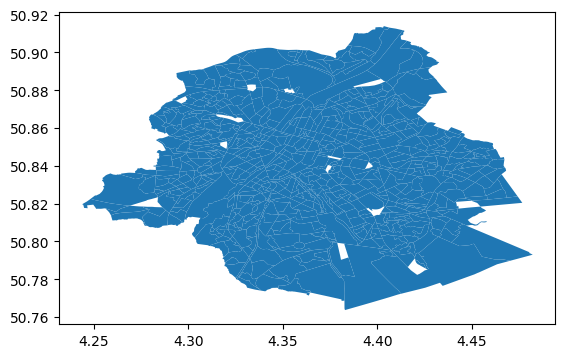

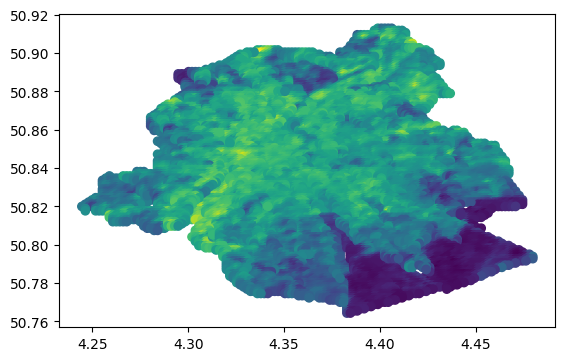

In [13]:
# Load le fichier csv avec les centroid (donc latitude, longitude, température)
data = pd.read_csv('../data/centroids/bxl_centroids.csv')
print(data.shape)
# un geojson de la région bruxelloise que j'avais en stock 
# (je l'ajoute en dessous du bloc de code dans Notion au cas où)
geo_data = gpd.read_file(f'../data/bxl_revenu_densite.json')
#print(geo_data.head())
geo_data.plot(aspect=1)
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.centroid_lon, data.centroid_lat), crs="EPSG:4326")
#print(gdf.head())
#gdf.plot(aspect=1,column="raster_value")
# Perform the spatial join
merged = gpd.sjoin(gdf, geo_data, predicate='within')
merged.plot(aspect=1,column="raster_value")

#Extract the name_fr (municipality name) column from the joined data
geo_data['REVENU_MOYEN'] = merged['REVENU_MOYEN']
geo_data['REVENU_MEDIAN'] = merged["REVENU_MEDIAN"]
geo_data['NOMBRE_HAB'] = merged["NOMBRE_HAB"]
geo_data['DENSITE_PAR_HECTARE'] = merged["DENSITE_PAR_HECTARE"]
geo_data['ms_area_ha'] = merged["ms_area_ha"]

final = merged[["centroid_lon","centroid_lat", "raster_value",
                "tx_sector_descr_fr", "REVENU_MOYEN", "REVENU_MEDIAN",
                    "NOMBRE_HAB","geometry","DENSITE_PAR_HECTARE",
                    "ms_area_ha","CD_SECTOR"]]
print(final.shape)

final.to_file(f"../assets/selection/bxl_sel_centroid.json", driver="GeoJSON")
final.head()

DriverError: '../data/sectorsGreenCoverageMap.json' not recognized as a supported file format.